# Шпаргалка

In [7]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats as sts
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True),

%matplotlib inline

## Теория вероятности

### Комбинаторика

**Без повторений**

_**Перестановки**_
$$P_n = n!$$

***Сочетания***
$$C_n^m = {n! \over (n-m)! * m!}$$

***Размещения***
$$A_n^m = C_n^m * P_m = {n! \over (n-m)!}$$

**C повторениями**

_**Перестановки**_
$$P_n = {n! \over n_1!*n_2!*n_3!*...*n_K!}$$

***Сочетания***
$$C_n^m = C_{n+m-1}^m = {(n+m-1)! \over (n-m)! * m!}$$

***Размещения***
$$A_n^m = n^m$$

###  Основы

**События**:
1. Случайные, достоверные, невозможные
1. Совместные, несовместные -> противоположные
1. Элементарные, неэлементарные

**Алгебра событий**
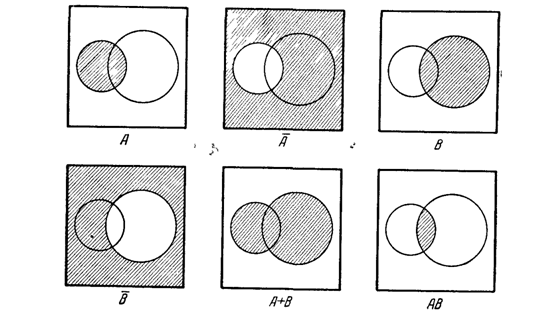
* P(A + B) = P(A) + P(B) - P(AB)
* P(AB) = 

### Теорема Байеса

## Статистика

### Случайные величины

Point = -0.90
PDF@point = 0.26717
CDF@point = 0.18527


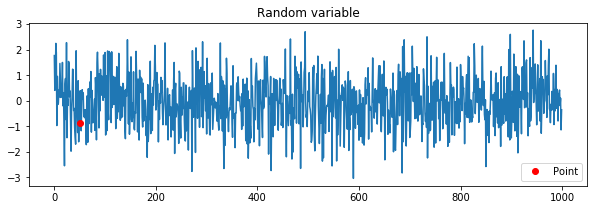

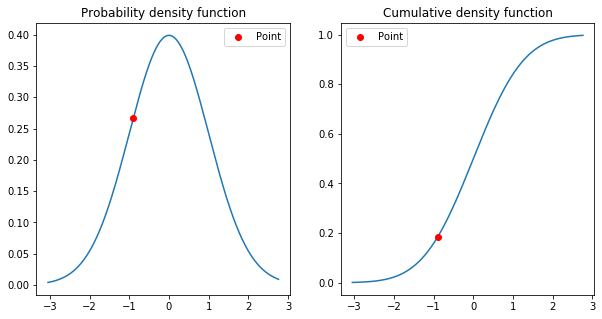

In [9]:
def demonstrateNormalDistibution(size, point_pos=0.05, **kwargs):
    np.random.seed(0)
    norm = sts.norm
    test = norm.rvs(size=size, **kwargs)
    point_pos = int(np.round(size * point_pos))
    point = test[point_pos]
    x = np.linspace(min(test), max(test), len(test))
    print(f'Point = {test[point_pos]:0.2f}')
    print(f'PDF@point = {norm.pdf(point):.5f}\nCDF@point = {norm.cdf(point):.5f}')

    plt.figure(figsize=(10,3))
    plt.title('Random variable')
    plt.plot(test)
    plt.plot(point_pos, point, 'ro', label='Point')
    plt.legend()
    
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.title('Probability density function')
    plt.plot(x, norm.pdf(x))
    plt.plot(point, norm.pdf(point), 'ro', label='Point')
    plt.legend()

    plt.subplot(122)
    plt.title('Cumulative density function')
    plt.plot(x, norm.cdf(x))
    plt.plot(point, norm.cdf(point), 'ro', label='Point')
    plt.legend()
demonstrateNormalDistibution(1000)

### Энтропия

$$\Large S = -\sum_{i=1}^{N}p_i \log_2{p_i}$$

$p_i$ - вероятность обнаружить систему в i-м состоянии

In [81]:
def enthropy(x):
    unq_dict = dict(zip(*(np.unique(x, return_counts=True))))
    s = 0
    for val, count in unq_dict.items():
        p = count/len(x)
        s -= p * np.log2(p)
    return s
a = [1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,0]
b = np.hstack(([0]*3, [1]*3, [2]*3))
enthropy(b), np.log2(3)

(1.584962500721156, 1.584962500721156)

### Прирост информации (Information gain, IG)

$$\Large IG(Q) = S_O - \sum_{i=1}^{q}\frac{N_i}{N}S_i$$

$S_0$ - энтропия выборки до разделения

$q$ - количество групп после разделения 

$N_i$ - количество элементов в i-й группе

$S_i$ - энтропия в каждой группе


In [93]:
def information_gain(x, thr):
    x_1 = x[:thr]
    x_2 = x[thr:]
    ent_0 = enthropy(x)
    
    ig = ent_0 - len(x_1)/len(x)*enthropy(x_1) - len(x_2)/len(x)*enthropy(x_2)
    return ig
print(f'{information_gain(a, 9):0.7f}')

0.0000736


### Неопределенность Джини (Gini impurity)

$$G = 1 - \sum\limits_k (p_k)^2$$

$p_k$ - вероятность i-го исхода

In [68]:
def gini_impurity(x):
    unq_dict = dict(zip(*(np.unique(x, return_counts=True))))
    gi = 1
    for val, count in unq_dict.items():
        gi -= np.square(count/len(x))
    return gi
gini_impurity(a)

0.49499999999999994

## ML

### Регуляризация

### Теория жюри Кондорсе

$$\large \mu = \sum_{i=m}^{N}{N\choose i}p^i(1-p)^{N-i}$$

$N$  is the total number of jurors;

$m$  is a minimal number of jurors that would make a majority, that is $\large m = floor(N/2) + 1$;

$\large {N \choose i}$  is the number of  𝑖 -combinations from a set with  𝑁  elements.

$p$  is the probability of the correct decision by a juror;

$µ$  is the probability of the correct decision by the whole jury.

In [5]:
from itertools import combinations
combinations

In [14]:
def condorcet(p, n):
    m = n//2+1
    res = 0
    for i in range(m, n+1):
        n_comb = len(list(combinations(range(n), i)))
        res += n_comb * p**i * (1 - p)**(n-i)
        
    return res
condorcet(.8, 7)

0.9666560000000001

## Python

## Алгоритмы

## Матан и линейная алгебра

### Интегралы

### Производная

Отправляясь в новое путешествие, тревелблогеры поставили на свою машину четыре новые шины и взяли запаску. Какое максимальное расстояние они смогут проехать, если известно, что шины на передних колёсах полностью изнашиваются через 45 000 км, а на задних — через 55 000 км? Все шины одинаковые, а условия поездки позволяют их переставлять.



x1 = x2 = x3 = x4 = x5

f1 + f1 * rear = x1 

In [10]:
base = 1
rear = 55000 / 45000
rear

1.2222222222222223

In [11]:
f = 45000
r = f * rear
f, r


(45000, 55000.00000000001)

$x = a*f + b*r$

$x = a*f + b * f * rear$

$x = f*(a + b*rear)$

$a + b = 1$

$x = f*(a + (1-a)*rear) = f*(a+rear-a*rear) = f*(a*(1-rear)+rear) = 45000*(a*(1-1.222222) + 1.222222)$

In [15]:
def func(x):
    return 45000*(x*(1-rear) + rear)

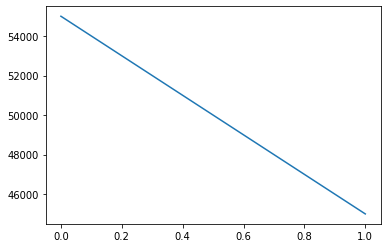

In [16]:
x = np.linspace(0, 1, 100)

plt.plot(x, func(x))

#  Гномики

## Skyline
In a 2 dimensional array grid, each value `grid[i][j]` represents the height of a building located there. We are allowed to increase the height of any number of buildings, by any amount (the amounts can be different for different buildings). Height 0 is considered to be a building as well. 

At the end, the "skyline" when viewed from all four directions of the grid, i.e. top, bottom, left, and right, must be the same as the skyline of the original grid. A city's skyline is the outer contour of the rectangles formed by all the buildings when viewed from a distance. See the following example.

What is the maximum total sum that the height of the buildings can be increased?

In [47]:
a = [ [3, 0, 8, 4], 
      [2, 4, 5, 7],
      [9, 2, 6, 3],
      [0, 3, 1, 0] ]

In [93]:
max_col = []
max_row = []
max_col = a[0].copy()
for i in a:
    print(i)
    max_row.append(max(i))
    for n, j in enumerate(i):
        if j > max_col[n]:
            max_col[n] = j
            
for n, i in enumerate(a):
    for m, j in enumerate(i):
        a[m][n] = min(max_col[n], max_row[m])
a


[8, 4, 8, 7]
[7, 4, 7, 7]
[9, 4, 8, 7]
[3, 3, 3, 3]


[[8, 4, 8, 7], [7, 4, 7, 7], [9, 4, 8, 7], [3, 3, 3, 3]]

## Поиск элементов массива в другом массиве

In [59]:
def find_jewels(J, S):
	set_J = set(J)
	jewels = 0
	for s in S:
		if s in set_J:
			jewels +=1
	return jewels

## Выявление самой длинной последовательности в бинарном векторе

In [92]:
f = open('test.txt')
n = f.readline().strip()
# f = f.read().split()
cur = 0
longest = 0
for i in f:
    if int(i) == 1:
        cur +=1
        longest = max(cur, longest)
    else:
        cur = 0
print(longest)

3


## Проверка на палиндромность

In [2]:
df = pd.DataFrame(np.array([[1, 2], [3, 4]]), columns=['a', 'b'])
df

,a,b
0,1,2
1,3,4


In [3]:
sum([ x ** 2 for x in range(5) if x % 2 == 0])

20